In [1]:
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
from tqdm import tqdm
import missingno

# Reverse Geocoding to get Poiwat and Voivod for Weather Stations

In [8]:
# geolocator = Nominatim(user_agent="Rukshar_Poland_Locator")

# location = geolocator.reverse( "52.509669, 13.376294")  #(location.latitude, location.longitude)

# print(location.address)
# print()
# print((location.latitude, location.longitude))
# print()
# print(location.raw)
# print()
# print(location.raw.keys())
# print()
# print(location.raw['address'])

In [32]:
geolocator = Nominatim(user_agent="Rukshar_Poland_Locator")
# Read from Dataframe
df = pd.read_csv('stations.csv')

lats=df['LAT'].to_list()
lons=df['LON'].to_list()
# Creating a zip with latitudes and longitudes
coords=list(zip(lats,lons))

full_address=[]
for i in tqdm(range(len(coords))):
    try: #to handle any undesirable exceptions and erros
        location = geolocator.reverse(coords[i])
        #print(location.raw['address'])
        loc = []
        powiat = np.NaN
        voivod = np.NaN
        try: #handle cases if powiat is absent
            powiat = location.raw['address']['county']
        except:
            powiat = np.NaN
        
        try: #handle cases if voivod is absent
            voivod = location.raw['address']['state']
        except:
            voivod = np.NaN
        loc = [
            powiat, voivod
            ] # county/powiat, state/voivod, 
        full_address.append(loc)
        #break
    except:
        loc = [
            np.NaN, np.NaN
            ] # county/powiat, state/voivod, 
        full_address.append(loc)
    
address=pd.DataFrame(data=full_address, columns=[  'county','state', ])



100%|██████████| 134/134 [01:09<00:00,  1.91it/s]


In [33]:
final_df = pd.concat([df, address], axis=1) #concat with the original stations data 
final_df.head()

,Unnamed: 0,STAID,STANAME,CN,LAT,LON,HGHT,county,state
0,0,24860,PSZCZYNA,PL,50.000000,18.916667,261,powiat pszczyński,województwo śląskie
1,1,24876,JABLONKA,PL,49.466667,19.700000,671,powiat nowotarski,województwo małopolskie
2,2,24880,GUBALOWKA,PL,49.300000,19.933333,856,powiat tatrzański,województwo małopolskie
3,3,24881,WITOW,PL,49.333333,19.833333,844,powiat tatrzański,województwo małopolskie
4,4,24885,LAZY,PL,49.966667,20.500000,251,powiat bocheński,województwo małopolskie


In [34]:
final_df.shape

(134, 9)

In [35]:
final_df.to_csv('stations_with_powiat_voivod.csv', index= False)

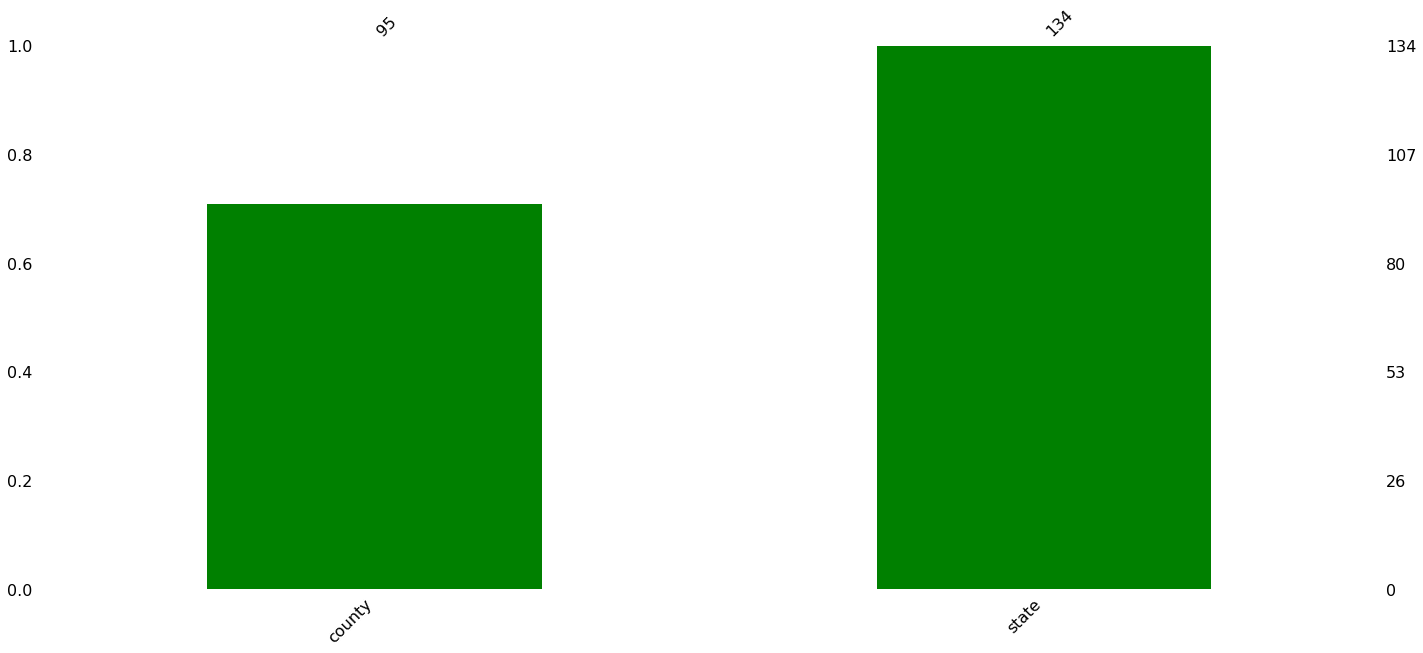

In [31]:
missingno.bar(address, color='g') #check for missing values and produce bar chart counting available data

# Reverse Geo Coding to Get Powiat for Air Particle Station

In [11]:
geolocator = Nominatim(user_agent="Rukshar_Poland_Locator")
#load excel file of air quality station metadata
air_quality_station_df = pd.read_excel('Metadata - station and measurement sites.xlsx', sheet_name="Measuring stations",engine='openpyxl')

lats=air_quality_station_df['WGS84 φ N'].to_list()
lons=air_quality_station_df['WGS84 λ E'].to_list()
# Creating a zip with latitudes and longitudes
coords=list(zip(lats,lons))

full_address=[]
for i in tqdm(range(len(coords))):
    try: #to handle any undesirable exceptions and erros
        location = geolocator.reverse(coords[i])
        #print(location.raw['address'])
        loc = []
        powiat = np.NaN
        #voivod = np.NaN
        try: #handle cases if powiat is absent
            powiat = location.raw['address']['county']
        except:
            powiat = np.NaN
        
        # try: #handle cases if voivod is absent
        #     voivod = location.raw['address']['state']
        # except:
        #     voivod = np.NaN
        loc = [
            powiat
            ] # county/powiat, state/voivod, 
        full_address.append(loc)
        #break
    except:
        loc = [
            np.NaN
            ] # county/powiat, state/voivod, 
        full_address.append(loc)
    
address=pd.DataFrame(data=full_address, columns=[  'county' ])


 28%|██▊       | 313/1104 [02:38<06:53,  1.91it/s]/home/rukshar/anaconda3/envs/selise/lib/python3.6/site-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)
100%|██████████| 1104/1104 [08:38<00:00,  2.13it/s]


In [14]:
final_df = pd.concat([air_quality_station_df, address], axis=1) #concat with the original stations data 
final_df.head()

,No,Station code,International code,Station name,Old station code,Launching date,Closing date,Station type,Region type,Station model,Voivodeship,City,Address,WGS84 φ N,WGS84 λ E,county
0,1,DsBialka,NaN,Białka,DsBialka,1990-01-03,2005-12-31,industrial,suburban,container,DOLNOŚLĄSKIE,Białka,NaN,51.197783,16.117390,powiat legnicki
1,2,DsBielGrot,NaN,Bielawa - ul. Grota Roweckiego,DsBielGrot,1994-01-02,2003-12-31,background,urban,in-house,DOLNOŚLĄSKIE,Bielawa,ul. Grota Roweckiego 6,50.682510,16.617348,powiat dzierżoniowski
2,3,DsBogatFrancMOB,PL0602A,Bogatynia Mobil,DsBogatMob,2015-01-01,2015-12-31,background,urban,mobile,DOLNOŚLĄSKIE,Bogatynia,ul. Francuska/Kręta,50.940998,14.916790,powiat zgorzelecki
3,4,DsBogChop,PL0315A,Bogatynia - Chopina,DsBogChop,1996-01-01,2013-12-31,industrial,urban,container,DOLNOŚLĄSKIE,Bogatynia,ul. Chopina 35,50.905856,14.967175,powiat zgorzelecki
4,5,DsBogZatonieMob,PL0576A,Bogatynia - Mobil,DsBogZatonieMob,2012-01-01,2012-12-31,industrial,urban,mobile,DOLNOŚLĄSKIE,Bogatynia,"ul. Konrada, Zatonie",50.943245,14.913327,powiat zgorzelecki


In [15]:
final_df.to_csv('air_quality_stations_with_powiat.csv', index= False)

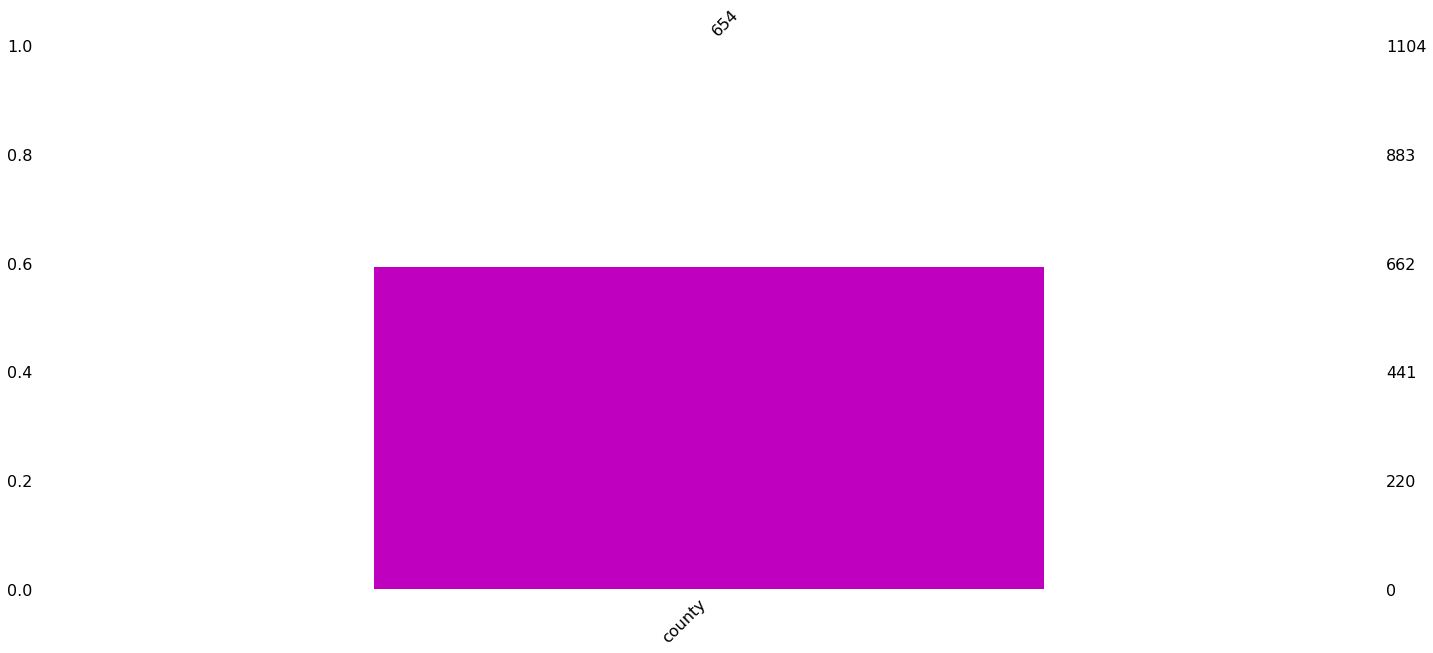

In [16]:
missingno.bar(address, color='m') #check for missing values and produce bar chart counting available data